In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output
from statsmodels.tsa.seasonal import STL

# Load and prepare the data
file_path = 'IBM_2006-01-01_to_2018-01-01.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.drop('Name', axis=1)


In [2]:
# Identify missing days 
all_days = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')

missing_days = all_days.difference(data.index)

missing_days_df = pd.DataFrame(missing_days, columns=['MissingDate'])
missing_days_df['DayOfWeek'] = missing_days_df['MissingDate'].dt.day_name()

print("Missing days with day of the week:")
print(missing_days_df)

pattern_analysis = missing_days_df['DayOfWeek'].value_counts()
print("\nPattern of missing days by day of the week:")
print(pattern_analysis)

Missing days with day of the week:
     MissingDate DayOfWeek
0     2006-01-07  Saturday
1     2006-01-08    Sunday
2     2006-01-14  Saturday
3     2006-01-15    Sunday
4     2006-01-16    Monday
...          ...       ...
1354  2017-12-16  Saturday
1355  2017-12-17    Sunday
1356  2017-12-23  Saturday
1357  2017-12-24    Sunday
1358  2017-12-25    Monday

[1359 rows x 2 columns]

Pattern of missing days by day of the week:
DayOfWeek
Saturday     625
Sunday       625
Monday        59
Friday        21
Thursday      17
Tuesday        8
Wednesday      4
Name: count, dtype: int64


In [3]:
# NaN values
data[data.isna().any(axis=1)]

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-31,NaN,144.93,NaN,144.67,4355718


In [4]:
# cleanup
data_resampled = data.asfreq('D')
data_resampled = data_resampled.interpolate(method='time')

# AR

In [5]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

close_prices = data_resampled['Close'].values  # Stock closing prices

# Parameters
T = 10  # Lag period 
epochs = 50
batch_size = 32

# Prepare the dataset
X, Y = [], []
for t in range(len(close_prices) - T):
    X.append(close_prices[t:t + T])  
    Y.append(close_prices[t + T])   

X = np.array(X)
Y = np.array(Y)

print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (4369, 10) Y.shape (4369,)


In [6]:
# Define Time Series Split
tscv = TimeSeriesSplit(n_splits=5)  # 5-fold cross-validation
split_results = []


Epoch 1/50
23/23 [==============================] - 2s 26ms/step - loss: 1199.1285 - val_loss: 39.1727
Epoch 2/50
23/23 [==============================] - 0s 9ms/step - loss: 27.8882 - val_loss: 27.8003
Epoch 3/50
23/23 [==============================] - 0s 9ms/step - loss: 7.2241 - val_loss: 12.2314
Epoch 4/50
23/23 [==============================] - 0s 10ms/step - loss: 4.1771 - val_loss: 10.7544
Epoch 5/50
23/23 [==============================] - 0s 10ms/step - loss: 4.1063 - val_loss: 10.6705
Epoch 6/50
23/23 [==============================] - 0s 12ms/step - loss: 4.4530 - val_loss: 10.6773
Epoch 7/50
23/23 [==============================] - 0s 12ms/step - loss: 3.9569 - val_loss: 10.4050
Epoch 8/50
23/23 [==============================] - 0s 12ms/step - loss: 3.9204 - val_loss: 10.3600
Epoch 9/50
23/23 [==============================] - 0s 12ms/step - loss: 4.0490 - val_loss: 10.6684
Epoch 10/50
23/23 [==============================] - 0s 12ms/step - loss: 4.5302 - val_loss: 10.93

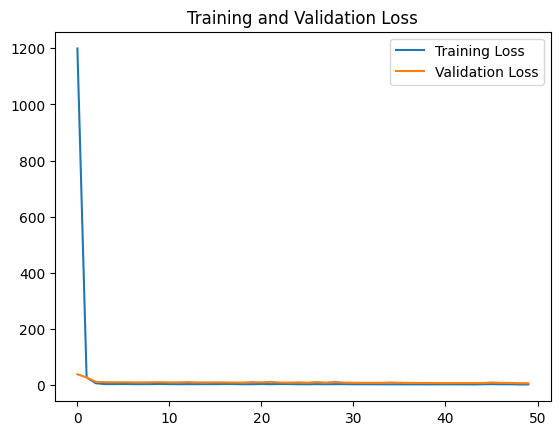

Epoch 1/50
46/46 [==============================] - 1s 8ms/step - loss: 850.0786 - val_loss: 24.7976
Epoch 2/50
46/46 [==============================] - 0s 4ms/step - loss: 8.6349 - val_loss: 11.1977
Epoch 3/50
46/46 [==============================] - 0s 4ms/step - loss: 7.6169 - val_loss: 10.4175
Epoch 4/50
46/46 [==============================] - 0s 4ms/step - loss: 7.4393 - val_loss: 10.1058
Epoch 5/50
46/46 [==============================] - 0s 4ms/step - loss: 7.2236 - val_loss: 11.5761
Epoch 6/50
46/46 [==============================] - 0s 5ms/step - loss: 7.2521 - val_loss: 10.5523
Epoch 7/50
46/46 [==============================] - 0s 5ms/step - loss: 6.9367 - val_loss: 9.4961
Epoch 8/50
46/46 [==============================] - 0s 5ms/step - loss: 6.8158 - val_loss: 9.6601
Epoch 9/50
46/46 [==============================] - 0s 5ms/step - loss: 6.7218 - val_loss: 9.3091
Epoch 10/50
46/46 [==============================] - 0s 5ms/step - loss: 6.3596 - val_loss: 8.8114
Epoch 11/50

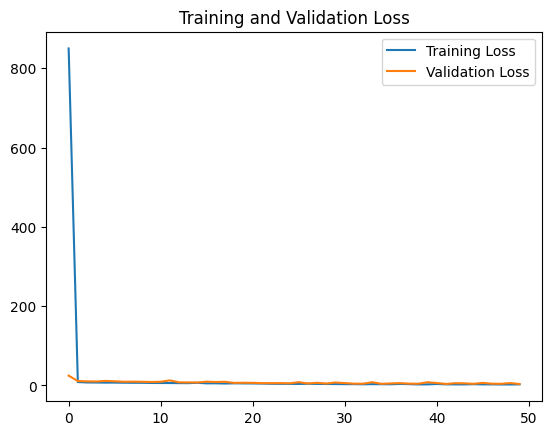

Epoch 1/50
69/69 [==============================] - 2s 11ms/step - loss: 2337.8088 - val_loss: 18.1892
Epoch 2/50
69/69 [==============================] - 0s 6ms/step - loss: 10.2285 - val_loss: 15.3458
Epoch 3/50
69/69 [==============================] - 0s 6ms/step - loss: 9.3322 - val_loss: 16.3178
Epoch 4/50
69/69 [==============================] - 0s 7ms/step - loss: 9.2546 - val_loss: 18.7267
Epoch 5/50
69/69 [==============================] - 0s 5ms/step - loss: 9.1571 - val_loss: 14.5796
Epoch 6/50
69/69 [==============================] - 0s 5ms/step - loss: 9.1937 - val_loss: 14.9061
Epoch 7/50
69/69 [==============================] - 0s 5ms/step - loss: 9.1851 - val_loss: 17.7979
Epoch 8/50
69/69 [==============================] - 0s 5ms/step - loss: 8.8834 - val_loss: 14.2008
Epoch 9/50
69/69 [==============================] - 0s 4ms/step - loss: 8.6592 - val_loss: 14.3756
Epoch 10/50
69/69 [==============================] - 0s 4ms/step - loss: 8.5989 - val_loss: 13.9100
Epoc

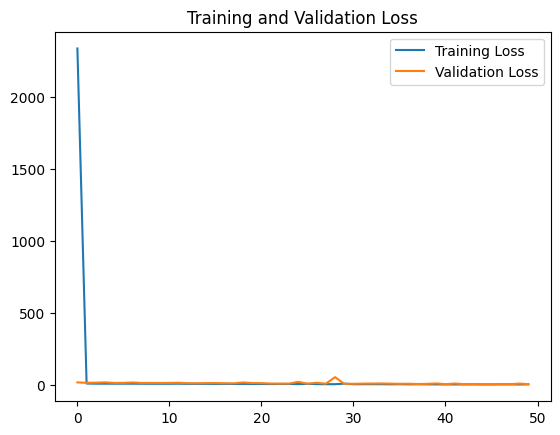

Epoch 1/50
92/92 [==============================] - 2s 7ms/step - loss: 373.3075 - val_loss: 5.6680
Epoch 2/50
92/92 [==============================] - 0s 4ms/step - loss: 5.2535 - val_loss: 6.2720
Epoch 3/50
92/92 [==============================] - 0s 4ms/step - loss: 5.1258 - val_loss: 5.1199
Epoch 4/50
92/92 [==============================] - 0s 4ms/step - loss: 5.2187 - val_loss: 5.5274
Epoch 5/50
92/92 [==============================] - 0s 4ms/step - loss: 5.5046 - val_loss: 5.6592
Epoch 6/50
92/92 [==============================] - 0s 4ms/step - loss: 4.7365 - val_loss: 31.2938
Epoch 7/50
92/92 [==============================] - 0s 4ms/step - loss: 6.4093 - val_loss: 4.4132
Epoch 8/50
92/92 [==============================] - 0s 4ms/step - loss: 4.4748 - val_loss: 20.3344
Epoch 9/50
92/92 [==============================] - 0s 4ms/step - loss: 5.3914 - val_loss: 4.8557
Epoch 10/50
92/92 [==============================] - 0s 4ms/step - loss: 4.7622 - val_loss: 4.9887
Epoch 11/50
92/

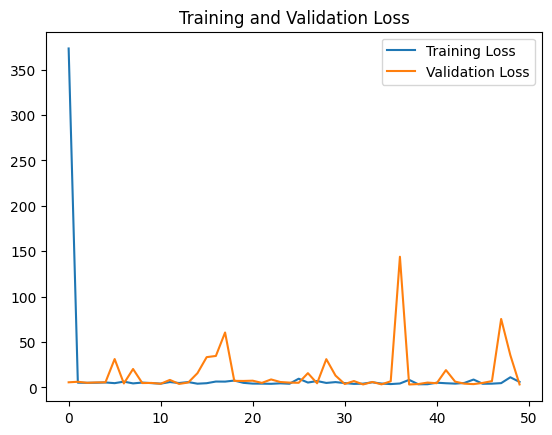

Epoch 1/50
114/114 [==============================] - 1s 4ms/step - loss: 1131.7003 - val_loss: 7.1088
Epoch 2/50
114/114 [==============================] - 0s 3ms/step - loss: 9.0341 - val_loss: 7.2485
Epoch 3/50
114/114 [==============================] - 0s 3ms/step - loss: 8.9433 - val_loss: 6.9752
Epoch 4/50
114/114 [==============================] - 0s 3ms/step - loss: 8.9352 - val_loss: 6.7636
Epoch 5/50
114/114 [==============================] - 0s 3ms/step - loss: 8.7707 - val_loss: 6.7814
Epoch 6/50
114/114 [==============================] - 0s 4ms/step - loss: 8.7422 - val_loss: 6.4181
Epoch 7/50
114/114 [==============================] - 0s 4ms/step - loss: 8.9785 - val_loss: 6.2649
Epoch 8/50
114/114 [==============================] - 0s 4ms/step - loss: 8.4069 - val_loss: 6.1559
Epoch 9/50
114/114 [==============================] - 0s 4ms/step - loss: 8.2841 - val_loss: 5.8023
Epoch 10/50
114/114 [==============================] - 0s 3ms/step - loss: 7.5174 - val_loss: 5.5

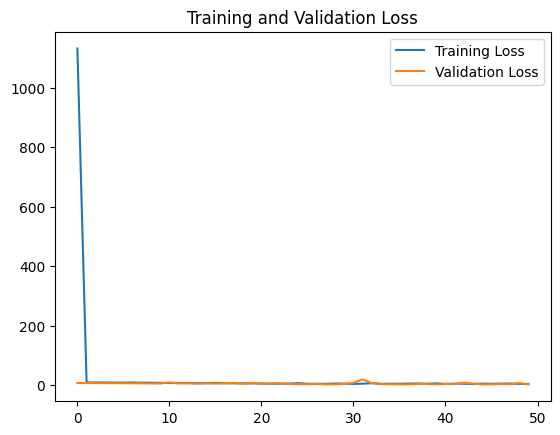

In [7]:
#  Autoregressive model define and training
for train_index, test_index in tscv.split(X):
    # Split into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    
    i = Input(shape=(T,))
    x = Dense(32, activation='relu')(i)  # Hidden layer 1
    x = Dense(16, activation='relu')(x)  # Hidden layer 2
    output = Dense(1)(x)  
    model = Model(i, output)
    model.compile(
        loss='mse',
        optimizer=Adam(learning_rate=0.01)
    )

    
    history = model.fit(
        X_train, Y_train,
        validation_data=(X_test, Y_test),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Predict
    Y_pred = model.predict(X_test).reshape(-1)  # Ensure output is 1D
    mse = mean_squared_error(Y_test, Y_pred)  # Compute MSE
    split_results.append((mse, Y_test, Y_pred))

    # 6. Plot training and validation loss
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.legend()
    plt.title("Training and Validation Loss")
    plt.show()



In [ ]:
# 7. Summarize results across splits
average_mse = np.mean([result[0] for result in split_results])
print(f"Average MSE across splits: {average_mse}")

# 8. Visualize the results for the last split
Y_test, Y_pred = split_results[-1][1], split_results[-1][2]
plt.figure(figsize=(14, 7))
plt.plot(Y_test, label="Actual Prices", alpha=0.7)
plt.plot(Y_pred, label="Predicted Prices", linestyle="--", color="red")
plt.title("Predicted vs Actual Prices (Last Split)")
plt.legend()
plt.show()

Epoch 1/50
114/114 [==============================] - 3s 9ms/step - loss: 728.7323 - val_loss: 8.8836
Epoch 2/50
114/114 [==============================] - 1s 5ms/step - loss: 9.2046 - val_loss: 7.1566
Epoch 3/50
114/114 [==============================] - 1s 5ms/step - loss: 9.5450 - val_loss: 7.4436
Epoch 4/50
114/114 [==============================] - 1s 5ms/step - loss: 8.8880 - val_loss: 7.4911
Epoch 5/50
114/114 [==============================] - 1s 5ms/step - loss: 8.7792 - val_loss: 6.6602
Epoch 6/50
114/114 [==============================] - 1s 6ms/step - loss: 8.6731 - val_loss: 7.9770
Epoch 7/50
114/114 [==============================] - 1s 10ms/step - loss: 8.5077 - val_loss: 6.2385
Epoch 8/50
114/114 [==============================] - 1s 7ms/step - loss: 8.2902 - val_loss: 6.0859
Epoch 9/50
114/114 [==============================] - 1s 7ms/step - loss: 8.3150 - val_loss: 6.8701
Epoch 10/50
114/114 [==============================] - 1s 6ms/step - loss: 7.4961 - val_loss: 7.3

Average MSE across splits: 4.56967290042647


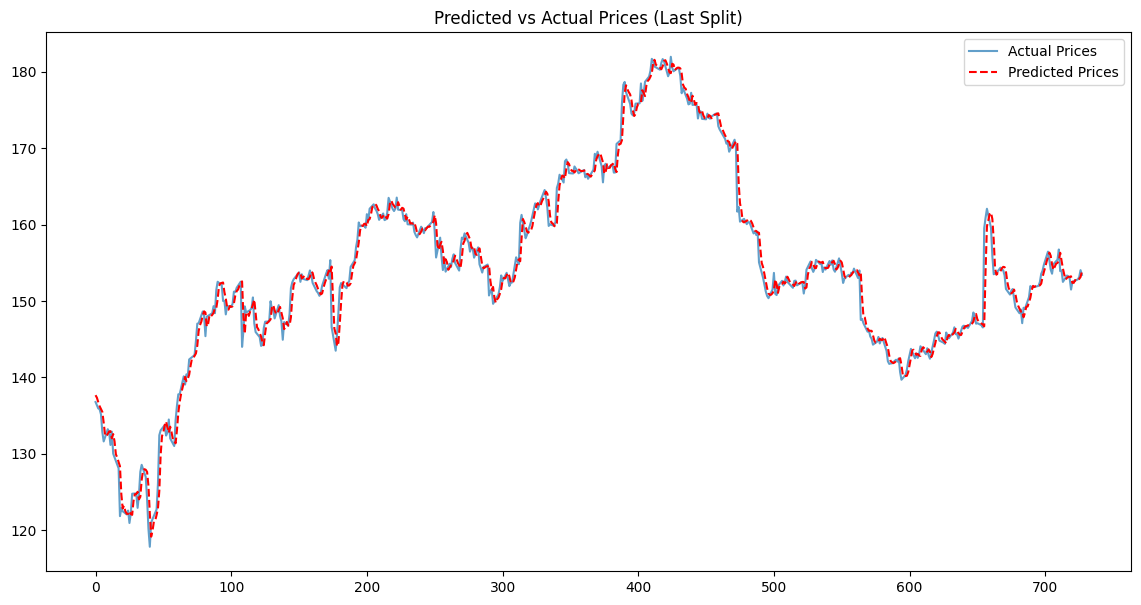

In [8]:
# 7. Summarize results across splits
average_mse = np.mean([result[0] for result in split_results])
print(f"Average MSE across splits: {average_mse}")

# 8. Visualize the results 
Y_test, Y_pred = split_results[-1][1], split_results[-1][2]
plt.figure(figsize=(14, 7))
plt.plot(Y_test, label="Actual Prices", alpha=0.7)
plt.plot(Y_pred, label="Predicted Prices", linestyle="--", color="red")
plt.title("Predicted vs Actual Prices (Last Split)")
plt.legend()
plt.show()